
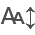

In [1]:
%load_ext autoreload
%autoreload 2
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# 1. Load Indices

In [2]:
import pandas as pd
from researchpkg.anomaly_detection.config import PREPROCESSED_PATH


AAER_INDEX_PATH  = PREPROCESSED_PATH/"AAER_PREPROCESSED"/"df_aaer_filtered_from_2009.xlsx"
MDA_INDEX_PATH = PREPROCESSED_PATH/"SEC_MDA"/"mda_ref_quarterly.xlsx"
FIN_INDEX_PATH =  PREPROCESSED_PATH/"SEC_FINANCIALS"/"sec_financials_quarterly_craja_no_financials.csv"



def load_all_index_data():
    """
    Load all index data
    """
    #1. AAER_index 
    index_aaer = pd.read_excel(AAER_INDEX_PATH)
    index_aaer.rename(columns={"tags":"labels"},inplace=True)
    index_aaer.drop(columns=["Unnamed: 0"],inplace=True)
    print("AAER index loaded")
    #2. MDA_index
    index_mda = pd.read_excel(MDA_INDEX_PATH,na_values="None")
    print("MDA index loaded")
    #3. Financials_index
    index_fin = pd.read_csv(FIN_INDEX_PATH,index_col=False)
    index_fin.drop(columns=["Unnamed: 0"],inplace=True)
    print("Financials index loaded")
    
    return index_aaer, index_mda, index_fin

Configuration Loaded from .env.local


In [3]:
index_aaer, index_mda, index_fin = load_all_index_data()

AAER index loaded
MDA index loaded
Financials index loaded


In [4]:
index_aaer["num_labels"] =  index_aaer["labels"].apply(lambda x: len(x.split(";")) if type(x) == str else 0)
index_aaer["num_complaints"] =  index_aaer["complaints"].apply(lambda x: len(x.split("####")) if type(x) == str else 0)

index_aaer["quarter"] = index_aaer["fiscal_quarter"].apply(lambda x: x[4:])
index_mda["quarter"] = index_mda["quarter"].apply(lambda x: x[4:])

index_aaer["company"]=index_aaer.company.str.lower()
index_mda["company"]=index_mda.company.str.lower()
index_fin["company"]=index_fin.company.str.lower()

cik_to_company_dict = dict(zip(index_fin["cik"], index_fin["company"]))
cik_to_company_dict.update(dict(zip(index_mda["cik"], index_mda["company"])))
cik_to_company_dict.update(dict(zip(index_aaer["cik"], index_aaer["company"])))

#Remove the company keys from th index
index_aaer.drop(columns=["company"], inplace=True)
index_mda.drop(columns=["company"], inplace=True)
index_fin.drop(columns=["company"], inplace=True)

## AAER Categories mapping

In [5]:
labels=list(set([x for g in index_aaer.labels.values for x in g.split(";")]))

In [6]:
glabel_mapping = {
    'FinancialMistatement': [
        'false financial statements',
        'financial accounting fraud',
        'cherry-picking scheme',
        'fraudulent conduct',
        'financial misstatements',
        'financial misconduct',
        'revenue management scheme',
        'accounting misconduct',
        'improper accounting',
        'financial misreporting',
        'material misrepresentations',
        'earnings management',
        'financial crisis',
        'auditing failure',
        'financial fraud',
        'fraudulent misrepresentation',
        'improper revenue recognition',
        'financial manipulation',
        'accounting fraud',
        'financial restatement',
        'financial statement fraud',
        'accounting errors',
        'financial misstatement',
        'revenue management',
        'fraudulent accounting',
        'financial reporting',
        'fraudulent scheme',
        'fraudulent reporting',
        'financial misrepresentation',
        'fraudulent financial misstatements',
        'disclosure fraud',
        'misleading financial statements',
        'misstatements in filings',
        'reporting fraud',
        'fraud',
        'misleading investors',
        'misrepresentation'
    ],

    'Regulatory&Security': [
        'anti-money laundering',
        'unregistered securities',
        'securities fraud',
        'disclosure violations',
        'investment adviser violations',
        'reporting violations',
        'securities violation',
        'non-GAAP violations',
        'tax liability',
        'bank failure',
        'data breach',
        'financial reporting violations',
        'securities violations',
        'misleading statements',
        'regulatory compliance',
        'securities law violations',
        'disclosure failures',
        'auditing violations',
        'investment management',
        'unauthorized audit reports',
        'audit deficiencies',
        'audit failure',
        'accounting violations',
        'audit failures',
        'valuation controls failure',
        'subpoena enforcement',
        'tax evasion'
    ],

    'Ethical&Corruption': [
        'conflicted transactions',
        'internal controls',
        'internal control violations',
        'illicit payments',
        'political corruption',
        'related-party transactions',
        'FCPA violation',
        'foreign bribery',
        'bribery',
        'control failures',
        'internal accounting controls',
        'internal control deficiencies',
        'bribery scheme',
        'internal controls failure',
        'FCPA violations',
        'corruption',
        'internal control failures',
        'foreign corrupt practices',
        'internal controls violations',
        'related party transactions',
        'internal control weaknesses',
        'whistleblower retaliation',
        'improper professional conduct',
        'misuse of funds',
        'misappropriation',
        'mail fraud'
    ],

    'MarketManipulation&TradingViolations': [
        'pump and dump scheme',
        'insider trading',
        'fraudulent trade allocation',
        'market manipulation',
        'illegal short selling',
        'front-running',
        'wash trading',
        'spoofing',
        'high-frequency trading abuse',
        'benchmark rate manipulation',
        'false trading',
        'collusion in trading',
        'misuse of market data'
    ]
}


label_to_glabel_dict={}
for glabel in glabel_mapping:
    for l in glabel_mapping[glabel]:
        label_to_glabel_dict[l]=glabel

index_aaer["glabels"]=index_aaer["labels"].apply(lambda x: ";".join(set([label_to_glabel_dict[t] for t in x.split(";")])))
index_aaer["num_glabels"] =  index_aaer["glabels"].apply(lambda x: len(x.split(";")) if type(x) == str else 0)

In [7]:
index_aaer

aaer_no   aeer_date                          role      cik  year  \
0     AAER-3063  2009-10-30                     defendant  1673358  2009   
1     AAER-3131  2010-05-05                     defendant  1088787  2009   
2     AAER-3131  2010-05-05                     defendant  1088787  2009   
3     AAER-3131  2010-05-05                     defendant  1088787  2009   
4     AAER-3131  2010-05-05                     defendant  1088787  2009   
...         ...         ...                           ...      ...   ...   
1991  AAER-4562  2025-02-04  entity involved in the fraud  1498068  2017   
1992  AAER-4562  2025-02-04  entity involved in the fraud  1498068  2017   
1993  AAER-4562  2025-02-04  entity involved in the fraud  1498068  2018   
1994  AAER-4562  2025-02-04  entity involved in the fraud  1498068  2018   
1995  AAER-4562  2025-02-04  entity involved in the fraud  1498068  2018   

     fiscal_quarter                                                url  \
0            2009q1  https://www.sec.gov/enforcement-litigation/lit...   
1            2009q1  https://www.sec.gov/enforcement-litigation/lit...   
2            2009q2  https://www.sec.gov/enforcement-litigation/lit...   
3            2009q3  https://www.sec.gov/enforcement-litigation/lit...   
4            2009q4  https://www.sec.gov/enforcement-litigation/lit...   
...             ...                                                ...   
1991         2017q3  https://www.sec.gov/files/litigation/admin/202...   
1992         2017q4  https://www.sec.gov/files/litigation/admin/202...   
1993         2018q1  https://www.sec.gov/files/litigation/admin/202...   
1994         2018q2  https://www.sec.gov/files/litigation/admin/202...   
1995         2018q3  https://www.sec.gov/files/litigation/admin/202...   

                                                 labels  \
0     fraud;unauthorized audit reports;material misr...   
1                 pump and dump scheme;securities fraud   
2                 pump and dump scheme;securities fraud   
3                 pump and dump scheme;securities fraud   
4                 pump and dump scheme;securities fraud   
...                                                 ...   
1991                  accounting fraud;disclosure fraud   
1992                  accounting fraud;disclosure fraud   
1993                  accounting fraud;disclosure fraud   
1994                  accounting fraud;disclosure fraud   
1995                  accounting fraud;disclosure fraud   

                                                summary  \
0     The SEC has charged China Holdings, Inc. and i...   
1     The SEC charged Spongetech Delivery Systems, I...   
2     The SEC charged Spongetech Delivery Systems, I...   
3     The SEC charged Spongetech Delivery Systems, I...   
4     The SEC charged Spongetech Delivery Systems, I...   
...                                                 ...   
1991  The SEC has instituted public administrative p...   
1992  The SEC has instituted public administrative p...   
1993  The SEC has instituted public administrative p...   
1994  The SEC has instituted public administrative p...   
1995  The SEC has instituted public administrative p...   

                                             complaints  num_labels  \
0     CHHL and Lu made material misrepresentations i...           3   
1     Metter, Moskowitz, and Spongetech engaged in a...           2   
2     Metter, Moskowitz, and Spongetech engaged in a...           2   
3     Metter, Moskowitz, and Spongetech engaged in a...           2   
4     Metter, Moskowitz, and Spongetech engaged in a...           2   
...                                                 ...         ...   
1991  Smith engaged in accounting practices that ope...           2   
1992  Smith engaged in accounting practices that ope...           2   
1993  Smith engaged in accounting practices that ope...           2   
1994  Smith engaged in accounting practices that ope...           2   
1995  S

In [8]:
index_mda

cik  year quarter   mda_year_id mda_quarter_id  has_nt_mda_year  \
0         13610  2009      q2    13610_2009   13610_2009q2            False   
1         29669  2009      q2           NaN   29669_2009q2            False   
2         38074  2009      q2    38074_2009   38074_2009q2            False   
3         86144  2009      q2    86144_2009   86144_2009q2            False   
4         92380  2009      q2    92380_2009            NaN            False   
...         ...   ...     ...           ...            ...              ...   
345324  2031561  2024      q4  2031561_2024            NaN            False   
345325  2032950  2024      q4           NaN            NaN            False   
345326  2033383  2024      q4           NaN            NaN            False   
345327  2037396  2024      q4           NaN            NaN            False   
345328  2042694  2024      q4           NaN            NaN            False   

        has_nt_mda_quarter  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  
...                    ...  
345324               False  
345325               False  
345326               False  
345327               False  
345328               False  

[345329 rows x 7 columns]

In [9]:
index_fin

cik  year quarter  sicagg  n_balance_sheet_features  \
0         13610  2009      q3      20                        19   
1       1080224  2009      q3      70                        19   
2       1124198  2009      q3      15                        19   
3         38074  2009      q3      20                        19   
4        883984  2009      q3      20                        19   
...         ...   ...     ...     ...                       ...   
162417  1585521  2023      q1      70                        20   
162418  1794515  2023      q1      70                        20   
162419  1713683  2023      q1      70                        20   
162420  1439288  2023      q1      20                        20   
162421   846475  2023      q1      20                        20   

        n_financial_ratios  n_benish_features  n_accrual_quality_features  \
0                        7                  8                           3   
1                        7                  8                           3   
2                        7                  8                           3   
3                        7                  8                           3   
4                        7                  8                           3   
...                    ...                ...                         ...   
162417                   7                  8                           3   
162418                   7                  8                           3   
162419                   7                  8                           3   
162420                   7                  8                           3   
162421                   7                  8                           3   

        n_performance_features  n_market_features  
0                            3                  2  
1                            3                  2  
2                            3                  2  
3                            3                  2  
4                            3                  2  
...                        ...                ...  
162417                       4                  2  
162418                       4                  2  
162419                       4                  2  
162420                       4                  2  
162421                       4                  2  

[162422 rows x 10 columns]

# 2. Merged Index

In [10]:
index_merged = pd.merge(index_aaer, index_mda, on = ["cik", "year","quarter"], how = "outer")
index_merged = pd.merge(index_merged, index_fin, on = ["cik", "year","quarter"])
index_merged.drop_duplicates(inplace=True)
index_merged["is_fraud"] = index_merged.aaer_no.notna()

In [11]:
index_merged

aaer_no   aeer_date                           role      cik  year  \
0       AAER-3385  2012-05-14                      defendant  1120830  2011   
1       AAER-3490  2013-09-19                     respondent    19617  2012   
2       AAER-3583  2014-09-24                      defendant  1070380  2012   
3       AAER-3585  2014-09-25                     respondent  1006892  2011   
4       AAER-3624  2015-01-29  entity involved in the scheme   929994  2011   
...           ...         ...                            ...      ...   ...   
162605        NaN         NaN                            NaN  2007596  2024   
162606        NaN         NaN                            NaN  2008861  2024   
162607        NaN         NaN                            NaN  2011208  2024   
162608        NaN         NaN                            NaN  2011641  2024   
162609        NaN         NaN                            NaN  2014596  2024   

       fiscal_quarter                                                url  \
0              2011q4  https://www.sec.gov/enforcement-litigation/lit...   
1              2012q1  https://www.sec.gov/files/litigation/admin/201...   
2              2012q1  https://www.sec.gov/files/litigation/admin/201...   
3              2011q3  https://www.sec.gov/files/litigation/admin/201...   
4              2011q4  https://www.sec.gov/files/litigation/admin/201...   
...               ...                                                ...   
162605            NaN                                                NaN   
162606            NaN                                                NaN   
162607            NaN                                                NaN   
162608            NaN                                                NaN   
162609            NaN                                                NaN   

                                                   labels  \
0                                        disclosure fraud   
1       disclosure fraud;internal controls;financial m...   
2                        financial fraud;disclosure fraud   
3       disclosure fraud;accounting fraud;internal con...   
4       disclosure fraud;fraudulent scheme;misleading ...   
...                                                   ...   
162605                                                NaN   
162606                                                NaN   
162607                                                NaN   
162608                                                NaN   
162609                                                NaN   

                                                  summary  \
0       The SEC filed a lawsuit against China Natural ...   
1       The SEC has instituted cease-and-desist procee...   
2       The SEC has instituted cease-and-desist procee...   
3       The SEC has instituted cease-and-desist procee...   
4       The SEC has imposed sanctions on John Buono, C...   
...                                                   ...   
162605                                                NaN   
162606                                                NaN   
162607                                                NaN   
162608                                                NaN   
162609                                                NaN   

                                               complaints  ...  \
0       Ji coordinated two short-term loans totaling m...  ...   
1       JPMorgan failed to maintain effective internal...  ...   
2       Falsification of time records and fraudulent r...  ...   
3       JDA Software Group, Inc. materially misstated ...  ...   
4       Buono and Bebo engaged in a fraudulent scheme ...  ...   
...                                                   ...  ...   
162605                                                NaN  ...   
162606                                                NaN  ...   
162607                                                NaN  ...   
162608                

In [12]:
#Number of duplicates
index_merged.duplicated(subset=["cik","year","quarter"]).sum()

145

In [13]:
print("Number of unique CIKs ", index_merged["cik"].nunique())
index_merged_with_aaer = index_merged[index_merged.is_fraud==True]
num_reports_with_aaer = index_merged_with_aaer.shape[0]
percent_reports_with_aaer = num_reports_with_aaer/index_merged.shape[0]*100
print("Number of reports with aaer_no(frauds) : ", num_reports_with_aaer, " out of ", index_merged_with_aaer.shape[0], " (", percent_reports_with_aaer, "%)")

num_reports_with_mda = index_merged[index_merged["mda_quarter_id"].notna()].shape[0]
percent_reports_with_mda = num_reports_with_mda/index_merged.shape[0]*100
print("Number of reports with quarterly mda : ", num_reports_with_mda, " out of ", index_merged.shape[0], " (", percent_reports_with_mda, "%)")

num_reports_with_quarterly_and_yearly_mda = index_merged[(index_merged["aaer_no"].notna()) & (index_merged["mda_quarter_id"].notna()) & (index_merged["mda_year_id"].notna())].shape[0]
percent_reports_with_quarterly_and_yearly_mda = num_reports_with_quarterly_and_yearly_mda/index_merged.shape[0]*100
print("Number of reports with quarterly and yearly mda : ", num_reports_with_quarterly_and_yearly_mda, " out of ", index_merged.shape[0], " (", percent_reports_with_quarterly_and_yearly_mda, "%)")


num_reports_with_aaer_and_mda = index_merged[(index_merged["aaer_no"].notna()) & (index_merged["mda_quarter_id"].notna())].shape[0]
percent_reports_with_aaer_and_mda = num_reports_with_aaer_and_mda/num_reports_with_aaer*100
print("Number of reports with aaer_no(frauds) and quarterly mda : ", num_reports_with_aaer_and_mda, " out of ", num_reports_with_aaer, "with mda", " (", percent_reports_with_aaer_and_mda, "%)")




Number of unique CIKs  8531
Number of reports with aaer_no(frauds) :  764  out of  764  ( 0.46996296888648303 %)
Number of reports with quarterly mda :  110512  out of  162566  ( 67.97977436856415 %)
Number of reports with quarterly and yearly mda :  383  out of  162566  ( 0.23559661921927094 %)
Number of reports with aaer_no(frauds) and quarterly mda :  498  out of  764 with mda  ( 65.18324607329843 %)


## Filtering : Keep only samples with quarterly mda

In [14]:
index_merged =index_merged[index_merged['mda_quarter_id'].notna()]

In [15]:
index_merged

aaer_no   aeer_date        role      cik  year fiscal_quarter  \
1       AAER-3490  2013-09-19  respondent    19617  2012         2012q1   
3       AAER-3585  2014-09-25  respondent  1006892  2011         2011q3   
6       AAER-3640  2015-02-24  respondent    42582  2011         2011q1   
7       AAER-3640  2015-02-24  respondent    42582  2011         2011q2   
8       AAER-3673  2015-08-06   defendant   785968  2012         2012q1   
...           ...         ...         ...      ...   ...            ...   
162572        NaN         NaN         NaN  1967649  2024            NaN   
162575        NaN         NaN         NaN  1968487  2024            NaN   
162584        NaN         NaN         NaN  1978811  2024            NaN   
162597        NaN         NaN         NaN  1996192  2024            NaN   
162608        NaN         NaN         NaN  2011641  2024            NaN   

                                                      url  \
1       https://www.sec.gov/files/litigation/admin/201...   
3       https://www.sec.gov/files/litigation/admin/201...   
6       https://www.sec.gov/files/litigation/admin/201...   
7       https://www.sec.gov/files/litigation/admin/201...   
8       https://www.sec.gov/files/litigation/admin/201...   
...                                                   ...   
162572                                                NaN   
162575                                                NaN   
162584                                                NaN   
162597                                                NaN   
162608                                                NaN   

                                                   labels  \
1       disclosure fraud;internal controls;financial m...   
3       disclosure fraud;accounting fraud;internal con...   
6                FCPA violations;bribery;disclosure fraud   
7                FCPA violations;bribery;disclosure fraud   
8        financial fraud;accounting fraud;reporting fraud   
...                                                   ...   
162572                                                NaN   
162575                                                NaN   
162584                                                NaN   
162597                                                NaN   
162608                                                NaN   

                                                  summary  \
1       The SEC has instituted cease-and-desist procee...   
3       The SEC has instituted cease-and-desist procee...   
6       The SEC has instituted cease-and-desist procee...   
7       The SEC has instituted cease-and-desist procee...   
8       The SEC has instituted cease-and-desist procee...   
...                                                   ...   
162572                                                NaN   
162575                                                NaN   
162584                                                NaN   
162597                                                NaN   
162608                                                NaN   

                                               complaints  ...  \
1       JPMorgan failed to maintain effective internal...  ...   
3       JDA Software Group, Inc. materially misstated ...  ...   
6       Goodyear subsidiaries in Kenya and Angola made...  ...   
7       Goodyear subsidiaries in Kenya and Angola made...  ...   
8       Miller Energy reported assets at an overstated...  ...   
...                                                   ...  ...   
162572                                                NaN  ...   
162575                                                NaN  ...   
162584                                                NaN  ...   
162597                                                NaN  ...   
162608                                                NaN  ...   

        has_nt_mda_year  has_nt_mda_quarter sicagg n_balance_sheet_features  \
1                 False               

### 2.1.Financial Statistics

In [16]:
FINANCIALS_FEATURES_COUNT_COLS = ["n_balance_sheet_features","n_financial_ratios","n_benish_features","n_accrual_quality_features","n_performance_features","n_market_features"]

#### Global Dataset

In [17]:
#Global dataset
index_merged[FINANCIALS_FEATURES_COUNT_COLS].describe()

n_balance_sheet_features  n_financial_ratios  n_benish_features  \
count             110512.000000       110512.000000      110512.000000   
mean                  19.878339            6.999937           7.992987   
std                    0.329295            0.007959           0.083773   
min                   18.000000            6.000000           6.000000   
25%                   20.000000            7.000000           8.000000   
50%                   20.000000            7.000000           8.000000   
75%                   20.000000            7.000000           8.000000   
max                   20.000000            7.000000           8.000000   

       n_accrual_quality_features  n_performance_features  n_market_features  
count               110512.000000           110512.000000      110512.000000  
mean                     2.979731                3.993693           1.999910  
std                      0.167772                0.079166           0.009512  
min                      0.000000                3.000000           1.000000  
25%                      3.000000                4.000000           2.000000  
50%                      3.000000                4.000000           2.000000  
75%                      3.000000                4.000000           2.000000  
max                      3.000000                4.000000           2.000000

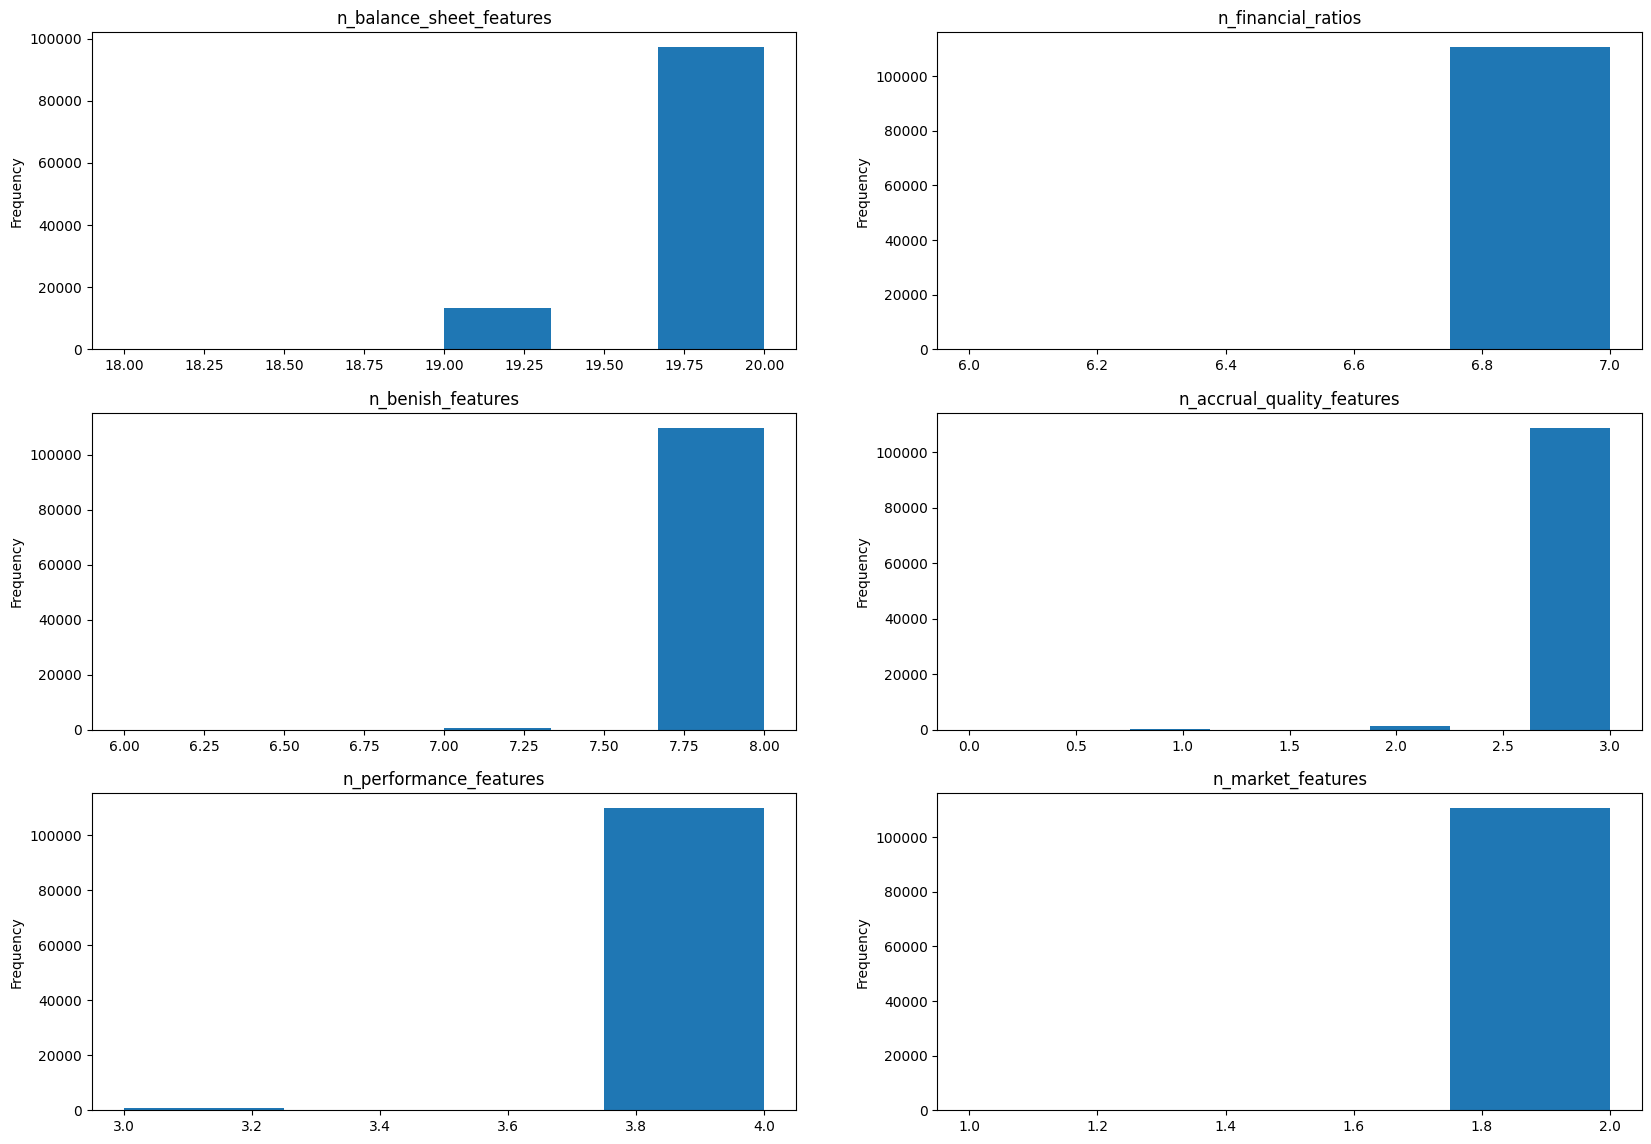

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,figsize=(20,14))
for i in range(6):
    feature = FINANCIALS_FEATURES_COUNT_COLS[i]
    index_merged[feature].plot(kind="hist",ax=axes[i//2, i%2],title=feature,bins=index_merged[feature].nunique()*2)

#### Fraud samples

In [19]:
# Dataset with aaer
index_merged_with_aaer = index_merged[index_merged['aaer_no'].notna()]
#Global dataset
index_merged_with_aaer[FINANCIALS_FEATURES_COUNT_COLS].describe()

n_balance_sheet_features  n_financial_ratios  n_benish_features  \
count                498.000000               498.0         498.000000   
mean                  19.857430                 7.0           7.997992   
std                    0.355688                 0.0           0.044811   
min                   18.000000                 7.0           7.000000   
25%                   20.000000                 7.0           8.000000   
50%                   20.000000                 7.0           8.000000   
75%                   20.000000                 7.0           8.000000   
max                   20.000000                 7.0           8.000000   

       n_accrual_quality_features  n_performance_features  n_market_features  
count                  498.000000              498.000000              498.0  
mean                     2.963855                3.993976                2.0  
std                      0.234583                0.077459                0.0  
min                      1.000000                3.000000                2.0  
25%                      3.000000                4.000000                2.0  
50%                      3.000000                4.000000                2.0  
75%                      3.000000                4.000000                2.0  
max                      3.000000                4.000000                2.0

In [20]:
index_merged_with_aaer[FINANCIALS_FEATURES_COUNT_COLS].query('n_balance_sheet_features > 9').describe()

n_balance_sheet_features  n_financial_ratios  n_benish_features  \
count                498.000000               498.0         498.000000   
mean                  19.857430                 7.0           7.997992   
std                    0.355688                 0.0           0.044811   
min                   18.000000                 7.0           7.000000   
25%                   20.000000                 7.0           8.000000   
50%                   20.000000                 7.0           8.000000   
75%                   20.000000                 7.0           8.000000   
max                   20.000000                 7.0           8.000000   

       n_accrual_quality_features  n_performance_features  n_market_features  
count                  498.000000              498.000000              498.0  
mean                     2.963855                3.993976                2.0  
std                      0.234583                0.077459                0.0  
min                      1.000000                3.000000                2.0  
25%                      3.000000                4.000000                2.0  
50%                      3.000000                4.000000                2.0  
75%                      3.000000                4.000000                2.0  
max                      3.000000                4.000000                2.0

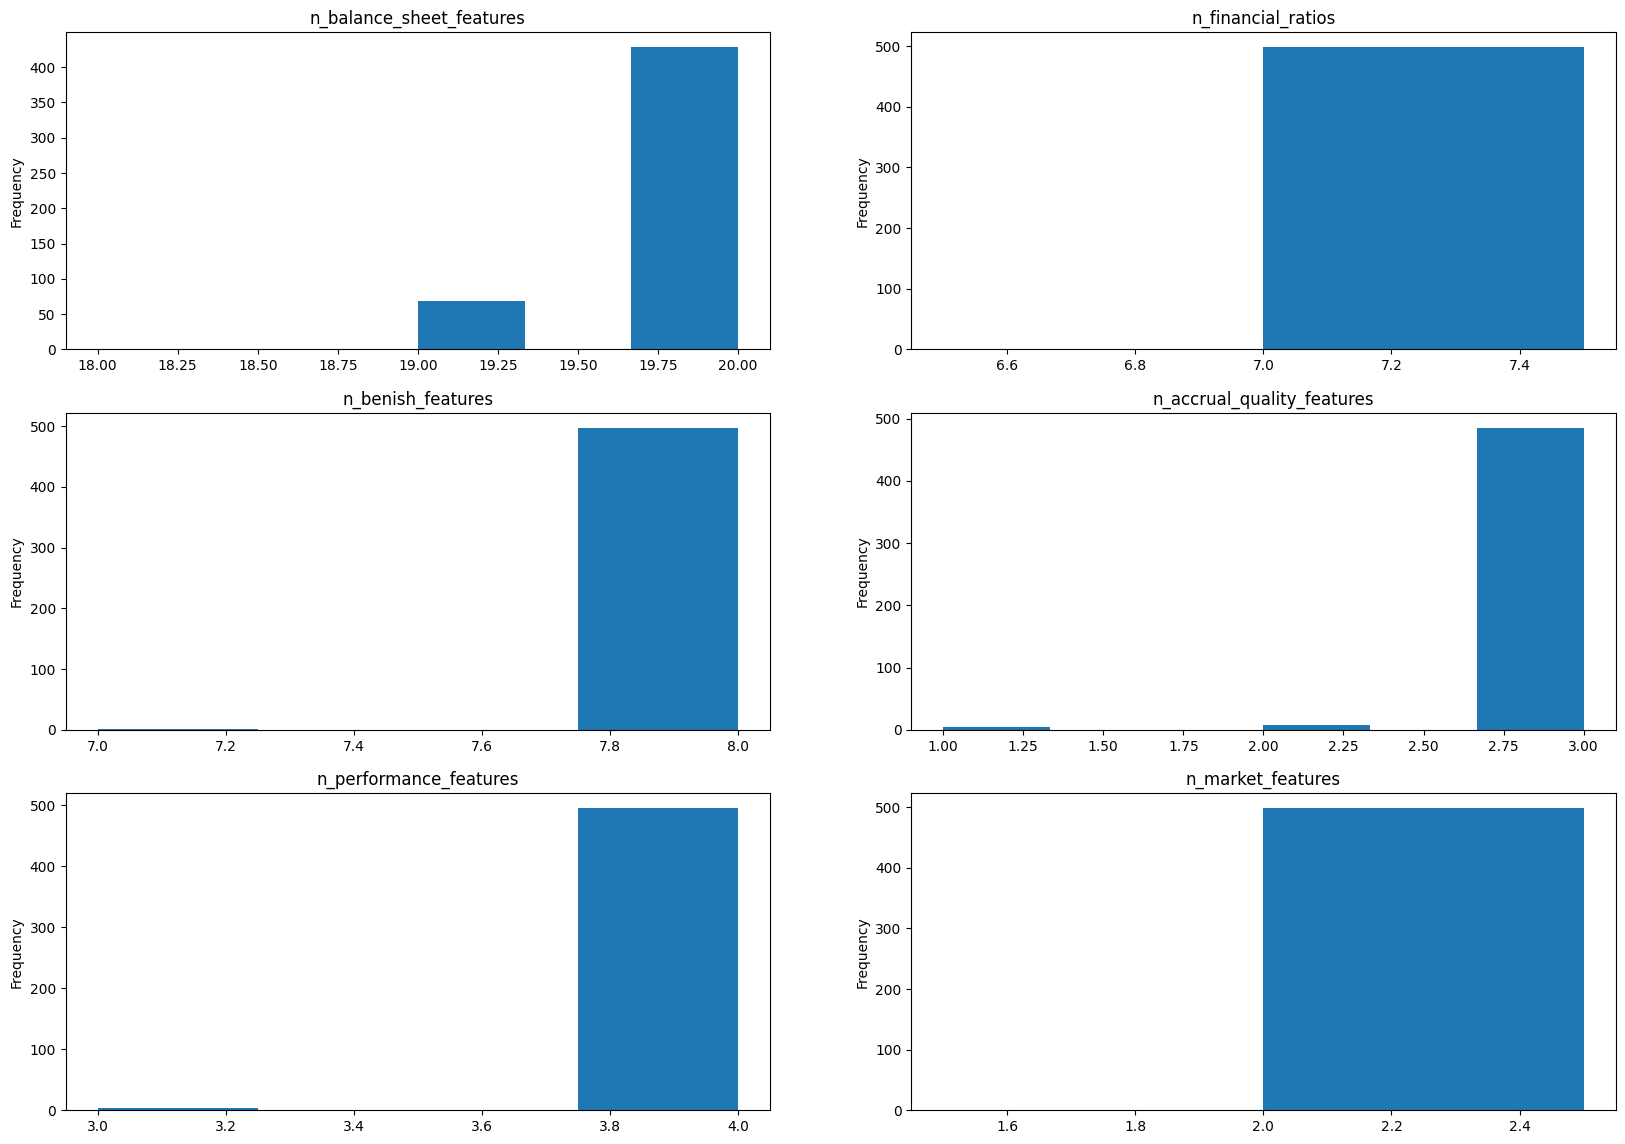

In [29]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,figsize=(20,14))
for i in range(6):
    feature = FINANCIALS_FEATURES_COUNT_COLS[i]
    index_merged_with_aaer[feature].plot(kind="hist",ax=axes[i//2, i%2],title=feature,bins=index_merged_with_aaer[feature].nunique()*2)

## Fraud labels statistics

<Axes: title={'center': 'Distribution of number of labels in AAER index'}, ylabel='Frequency'>

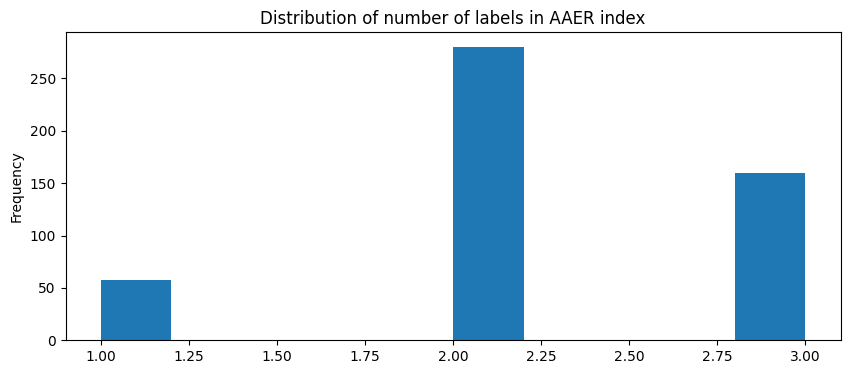

In [32]:
index_merged_with_aaer.num_labels.plot(kind="hist",figsize=(10,4), title="Distribution of number of labels in AAER index")

<Axes: title={'center': 'Distribution of number of labels in AAER index'}, ylabel='Frequency'>

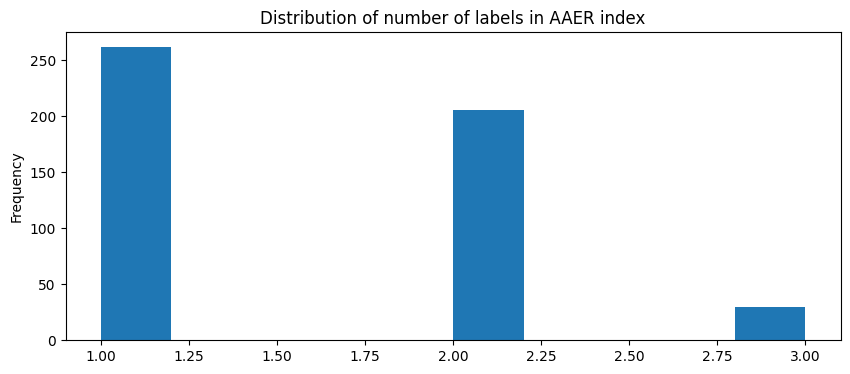

In [33]:
index_merged_with_aaer.num_glabels.plot(kind="hist",figsize=(10,4), title="Distribution of number of labels in AAER index")

In [34]:
labels_count= {}
for label_list in index_merged_with_aaer.labels.values:
    for l in label_list.split(";"):
        labels_count[l]=1+labels_count.get(l,0)
labels_count = dict(sorted(labels_count.items(),key=lambda x: x[1]))

In [35]:
glabels_count= {}
for glabel_list in index_merged_with_aaer.glabels.values:
    for l in glabel_list.split(";"):
        glabels_count[l]=1+glabels_count.get(l,0)
glabels_count = dict(sorted(glabels_count.items(),key=lambda x: x[1]))

<BarContainer object of 47 artists>

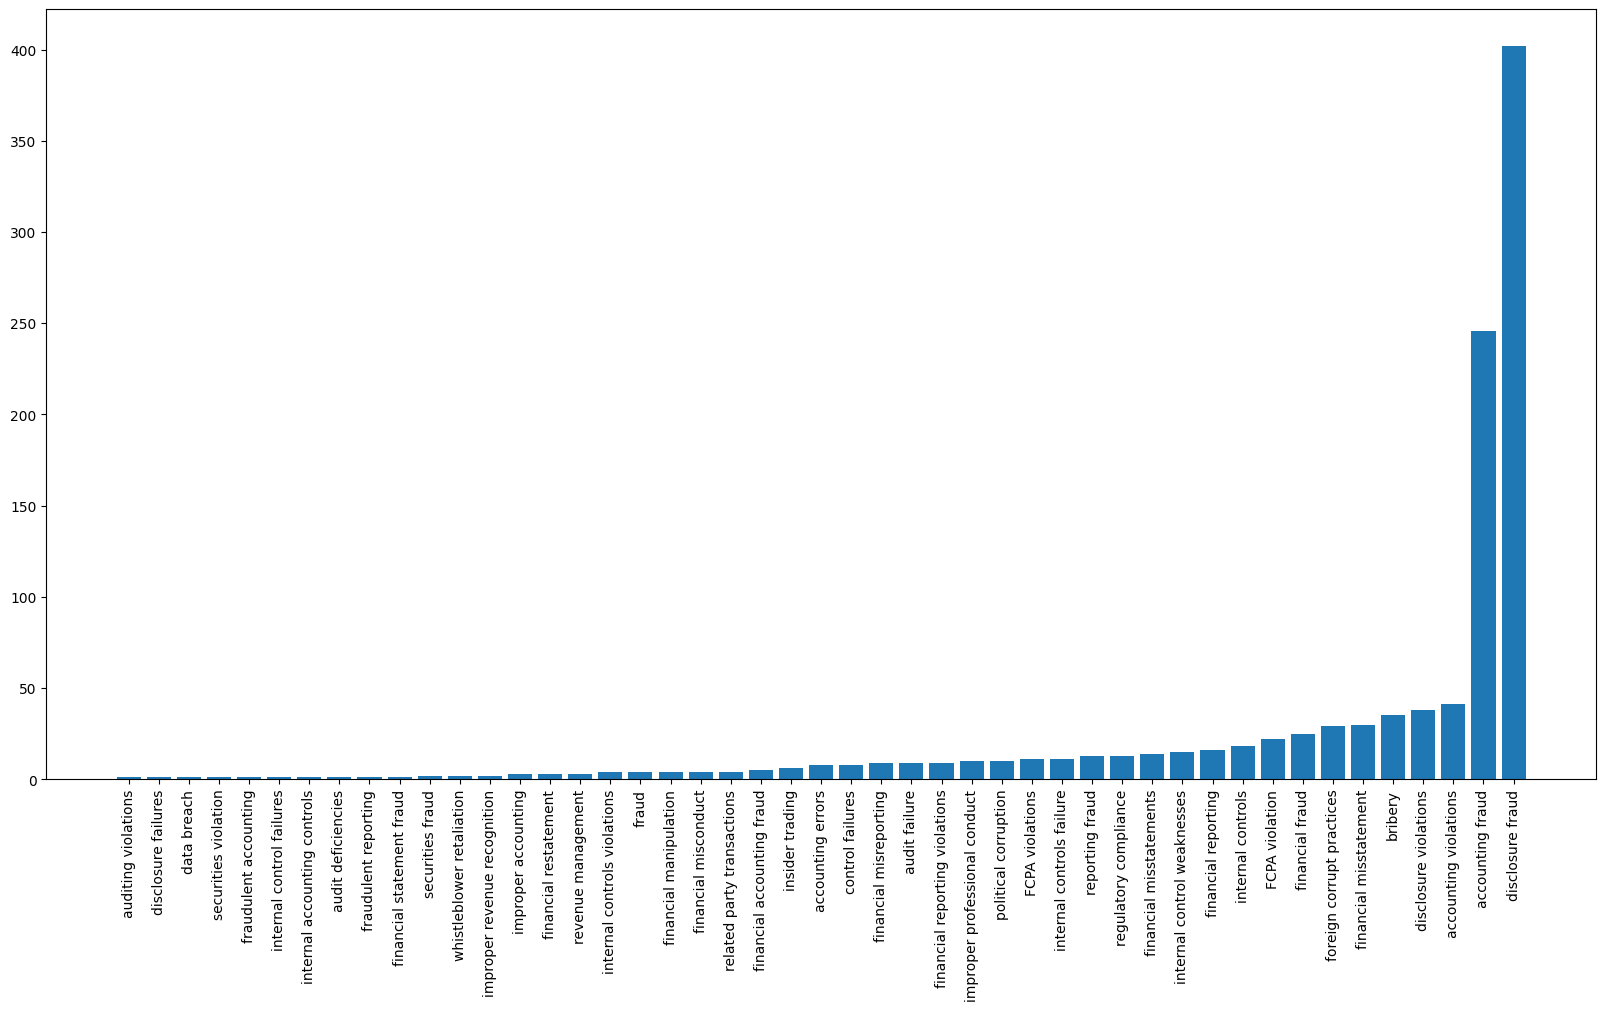

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)  #
plt.bar(list(labels_count.keys()),list(labels_count.values()))

<BarContainer object of 4 artists>

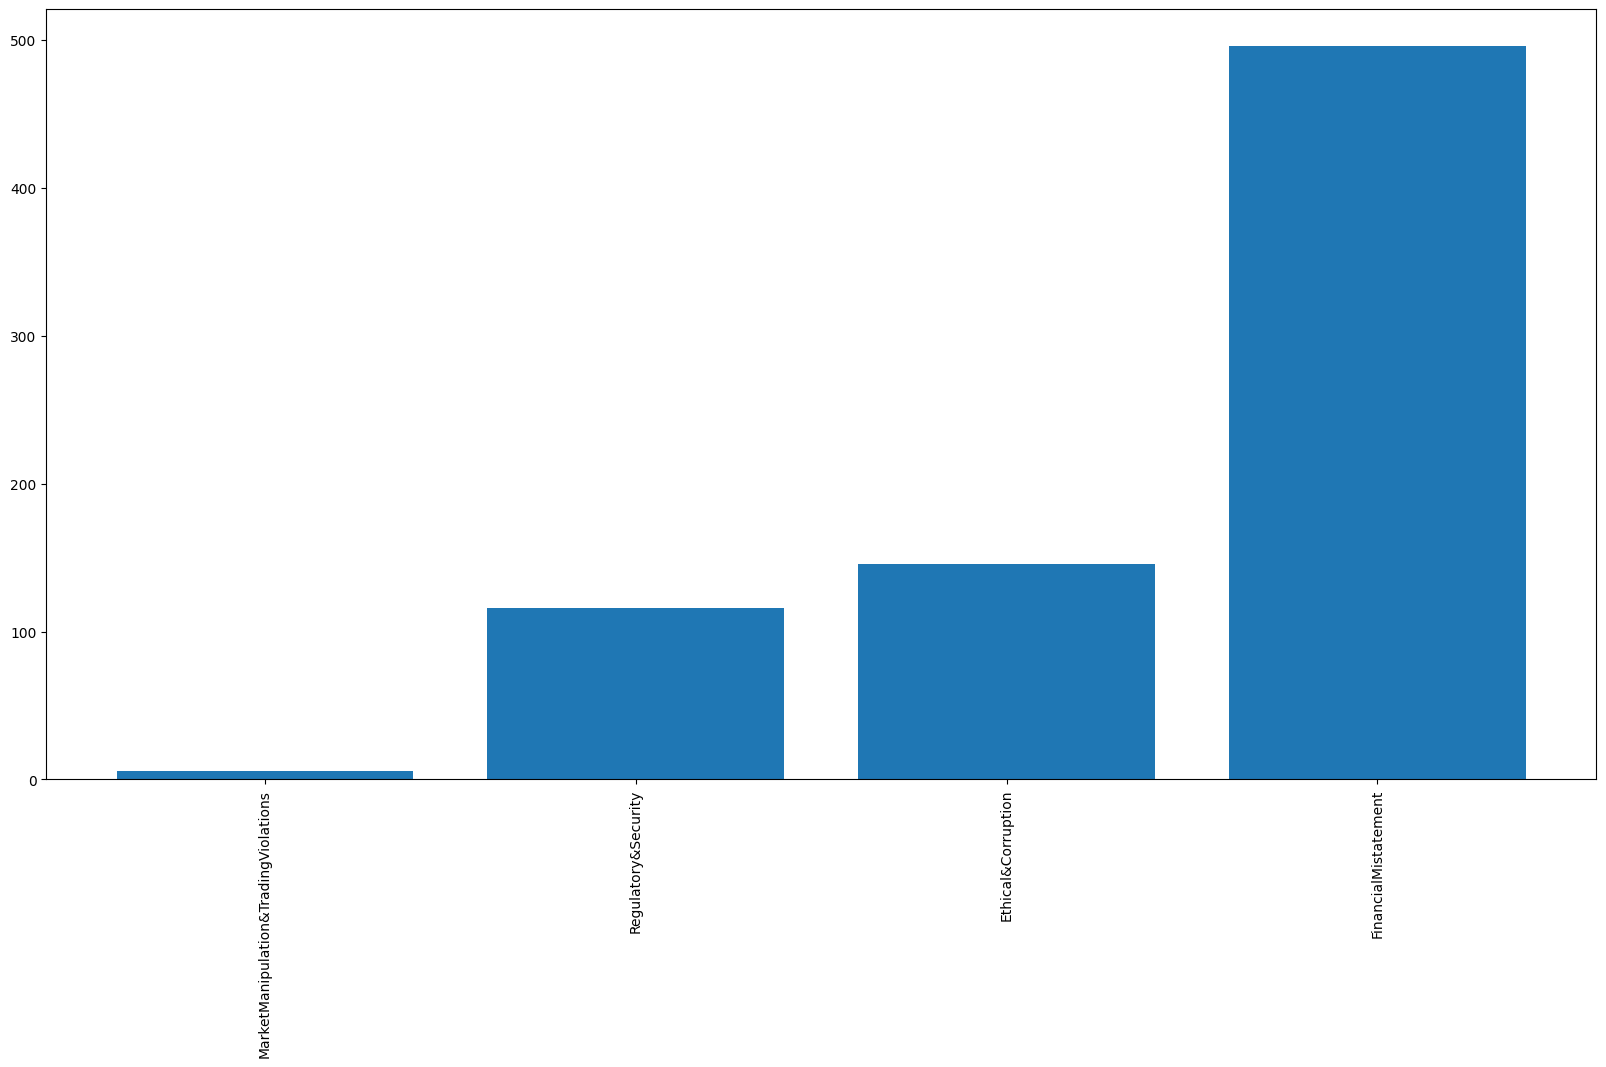

In [37]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)  #
plt.bar(list(glabels_count.keys()),list(glabels_count.values()))

# Serial Fraud

Analysis the consecutive fraud cases

In [38]:
from tqdm import tqdm


index_merged_with_aaer = index_merged[index_merged['aaer_no'].notna()][["cik","year","quarter"]]
index_merged_with_aaer["serial_count"]= 1
index_merged_with_aaer["total_serial_count"]= 1

index_merged_with_aaer = index_merged_with_aaer.sort_values(by=["cik","year","quarter"]).drop_duplicates()


current_count =  1
current_series_start = 0
current_series_end = 0
def isConsecutive(d1,d2):
    y1,q1 = d1
    y2,q2 = d2
    if y1 == y2:
        if q1 == q2 - 1:
            return True
    elif y1 == y2 - 1:
        if q1 == 4 and q2 == 1:
            return True
    return False
for i in tqdm(range(1,index_merged_with_aaer.shape[0]),"Counting Serial frauds"):
    is_end_of_series = False
    if index_merged_with_aaer.iloc[i]["cik"] == index_merged_with_aaer.iloc[i-1]["cik"]:
        y1= int(index_merged_with_aaer.iloc[i-1]["year"])
        q1= int(index_merged_with_aaer.iloc[i-1]["quarter"][-1])
        y2= int(index_merged_with_aaer.iloc[i]["year"])
        q2= int(index_merged_with_aaer.iloc[i]["quarter"][-1])
        
        if isConsecutive((y1,q1),(y2,q2)):
            current_count += 1
            current_series_end = i
            index_merged_with_aaer.iloc[i, index_merged_with_aaer.columns.get_loc("serial_count")] = current_count
        else:
            is_end_of_series = True
    else:
        is_end_of_series = True
    
    if is_end_of_series:
        #End of series , assign the  total count to all the elements in the series
        index_merged_with_aaer.iloc[current_series_start:current_series_end + 1, index_merged_with_aaer.columns.get_loc("total_serial_count")] = current_count
        
        current_count = 1
        current_series_start = i
        current_series_end = i

Counting Serial frauds: 100%|██████████| 403/403 [00:00<00:00, 3643.71it/s]


<Axes: title={'center': 'Distribution of serial frauds'}>

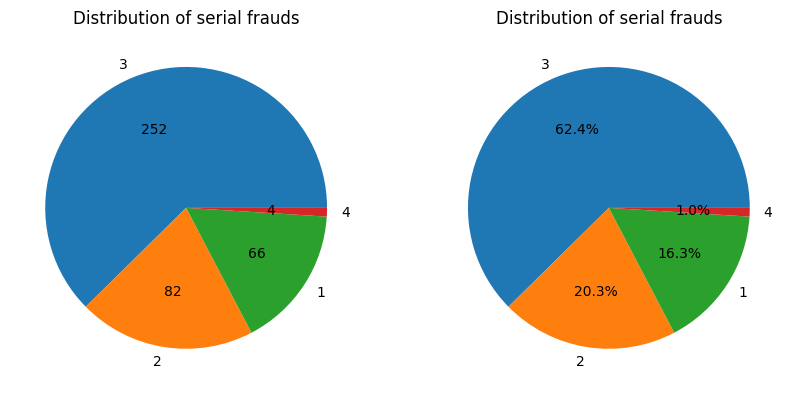

In [39]:
#Plot the distribution of serial frauds
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
#First pie with raw values
fraud_counts = index_merged_with_aaer["total_serial_count"].value_counts()
def autopct_raw(pct):
    total = sum(fraud_counts)
    absolute = int(round(pct * total / 100.0))  # Convert percent to raw count
    return f'{absolute}'  # Display raw count

index_merged_with_aaer.value_counts("total_serial_count").plot.pie(autopct=autopct_raw,title="Distribution of serial frauds",ax=ax1)
index_merged_with_aaer.value_counts("total_serial_count").plot.pie(autopct='%1.1f%%',title="Distribution of serial frauds",ax=ax2)

## Remark : 
67% of the frauds are series of 3 frauds ie in 3 consecutive quarters

In [40]:
#merge with initial dataframe
index_merged = index_merged.merge(index_merged_with_aaer,on=["cik","year","quarter"],how="left")

In [41]:
index_merged

aaer_no   aeer_date        role      cik  year fiscal_quarter  \
0       AAER-3490  2013-09-19  respondent    19617  2012         2012q1   
1       AAER-3585  2014-09-25  respondent  1006892  2011         2011q3   
2       AAER-3640  2015-02-24  respondent    42582  2011         2011q1   
3       AAER-3640  2015-02-24  respondent    42582  2011         2011q2   
4       AAER-3673  2015-08-06   defendant   785968  2012         2012q1   
...           ...         ...         ...      ...   ...            ...   
110507        NaN         NaN         NaN  1967649  2024            NaN   
110508        NaN         NaN         NaN  1968487  2024            NaN   
110509        NaN         NaN         NaN  1978811  2024            NaN   
110510        NaN         NaN         NaN  1996192  2024            NaN   
110511        NaN         NaN         NaN  2011641  2024            NaN   

                                                      url  \
0       https://www.sec.gov/files/litigation/admin/201...   
1       https://www.sec.gov/files/litigation/admin/201...   
2       https://www.sec.gov/files/litigation/admin/201...   
3       https://www.sec.gov/files/litigation/admin/201...   
4       https://www.sec.gov/files/litigation/admin/201...   
...                                                   ...   
110507                                                NaN   
110508                                                NaN   
110509                                                NaN   
110510                                                NaN   
110511                                                NaN   

                                                   labels  \
0       disclosure fraud;internal controls;financial m...   
1       disclosure fraud;accounting fraud;internal con...   
2                FCPA violations;bribery;disclosure fraud   
3                FCPA violations;bribery;disclosure fraud   
4        financial fraud;accounting fraud;reporting fraud   
...                                                   ...   
110507                                                NaN   
110508                                                NaN   
110509                                                NaN   
110510                                                NaN   
110511                                                NaN   

                                                  summary  \
0       The SEC has instituted cease-and-desist procee...   
1       The SEC has instituted cease-and-desist procee...   
2       The SEC has instituted cease-and-desist procee...   
3       The SEC has instituted cease-and-desist procee...   
4       The SEC has instituted cease-and-desist procee...   
...                                                   ...   
110507                                                NaN   
110508                                                NaN   
110509                                                NaN   
110510                                                NaN   
110511                                                NaN   

                                               complaints  ...  sicagg  \
0       JPMorgan failed to maintain effective internal...  ...      60   
1       JDA Software Group, Inc. materially misstated ...  ...      70   
2       Goodyear subsidiaries in Kenya and Angola made...  ...      20   
3       Goodyear subsidiaries in Kenya and Angola made...  ...      20   
4       Miller Energy reported assets at an overstated...  ...      10   
...                                                   ...  ...     ...   
110507                                                NaN  ...      50   
110508                                                NaN  ...      20   
110509                                                NaN  ...      60   
110510                                                NaN  ...      40   
110511                                                NaN  ...      50   

        n_balance_she

# Number of submission per companies stats

In [42]:
index_merged["cik_submission_count"] = index_merged.groupby("cik")['quarter'].transform("count")


In [43]:
index_cik_count = index_merged[["cik","cik_submission_count"]].drop_duplicates(["cik"]).sort_values('cik_submission_count',ascending=False)
index_cik_count["company"] = index_cik_count["cik"].apply(lambda x : cik_to_company_dict[x])
index_cik_count

cik  cik_submission_count                         company
506     1002638                    47                  open text corp
562     1024478                    46        rockwell automation, inc
564     1045810                    46                     nvidia corp
503      883984                    46              icu medical inc/de
436       10795                    46   becton, dickinson and company
...         ...                   ...                             ...
10350   1426703                     1                   matches, inc.
10340   1421665                     1  solar energy initiatives, inc.
76580    875355                     1                   lendway, inc.
77133   1110805                     1              nustar energy l.p.
110511  2011641                     1  ferguson enterprises inc. /de/

[7660 rows x 3 columns]

In [44]:
index_cik_count.describe()

cik  cik_submission_count
count  7.660000e+03           7660.000000
mean   1.167474e+06             14.427154
std    4.898374e+05             12.608989
min    1.750000e+03              1.000000
25%    8.933270e+05              4.000000
50%    1.272088e+06             10.000000
75%    1.532190e+06             23.000000
max    2.011641e+06             47.000000

In [45]:
index_merged_with_aaer = index_merged[index_merged.is_fraud==True]
index_merged_with_aaer["cik_submission_count"] = index_merged_with_aaer.groupby("cik")['quarter'].transform("count")


index_cik_count_aaer = index_merged_with_aaer[["cik","cik_submission_count"]].drop_duplicates(["cik"]).sort_values('cik_submission_count',ascending=False)
index_cik_count_aaer["company"] = index_cik_count_aaer["cik"].apply(lambda x : cik_to_company_dict[x])
index_cik_count_aaer

/tmp/ipykernel_441576/1134917746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_merged_with_aaer["cik_submission_count"] = index_merged_with_aaer.groupby("cik")['quarter'].transform("count")


cik  cik_submission_count                                 company
250   917523                    29  revolution lighting technologies, inc.
452     1750                    18                                     aar
199  1375365                    18              super micro computer, inc.
100   902791                    17         barrett business services, inc.
83     29915                    15                the dow chemical company
..       ...                   ...                                     ...
1    1006892                     1                jda software group, inc.
27   1080360                     1           china valves technology, inc.
372   708819                     1            mcdermott international inc.
326  1039065                     1                       osi systems, inc.
0      19617                     1                    jpmorgan chase & co.

[87 rows x 3 columns]

In [46]:
index_cik_count_aaer.describe()

cik  cik_submission_count
count  8.700000e+01             87.000000
mean   9.968132e+05              5.724138
std    4.875882e+05              5.148243
min    1.750000e+03              1.000000
25%    8.206795e+05              2.000000
50%    1.066923e+06              4.000000
75%    1.354308e+06              8.000000
max    1.760173e+06             29.000000

In [47]:
index_cik_count = index_merged[["cik","cik_submission_count"]].drop_duplicates(["cik"]).sort_values('cik_submission_count',ascending=False)
index_cik_count["company"] = index_cik_count["cik"].apply(lambda x : cik_to_company_dict[x])
index_cik_count

cik  cik_submission_count                         company
506     1002638                    47                  open text corp
562     1024478                    46        rockwell automation, inc
564     1045810                    46                     nvidia corp
503      883984                    46              icu medical inc/de
436       10795                    46   becton, dickinson and company
...         ...                   ...                             ...
10350   1426703                     1                   matches, inc.
10340   1421665                     1  solar energy initiatives, inc.
76580    875355                     1                   lendway, inc.
77133   1110805                     1              nustar energy l.p.
110511  2011641                     1  ferguson enterprises inc. /de/

[7660 rows x 3 columns]

# Filter reports to obtain a suitable ratio fraud non fraud

In [48]:
TARGET_FRAUD_RATIO =  0.4 # First start with 40% of fraud

## Fraud Vs Non Fraud Label
- Current ratio fraud / total_data = 0.3% (too imbalanced ❌)
- **Objective** : Filter the non fraud samples to obtain around 1% of fraud samples.

In [49]:
def size_ratio(d1,d2):
    ratio= round(len(d1)/(len(d1)+len(d2))*100,2)
    return f"{ratio}%, {len(d1)} samples vs  {len(d2)} samples"

In [59]:
max_n_features = sum([index_merged[feature].max() for feature in FINANCIALS_FEATURES_COUNT_COLS])
print("Number of features in the dataset : ", max_n_features)

index_merged["n_features"] = index_merged[FINANCIALS_FEATURES_COUNT_COLS].sum(axis=1)


Number of features in the dataset :  44


In [56]:
index_merged["n_features"].describe()

count    110512.000000
mean         43.844596
std           0.438374
min          38.000000
25%          44.000000
50%          44.000000
75%          44.000000
max          44.000000
Name: n_features, dtype: float64

In [96]:
index_merged_with_fraud = index_merged.query("is_fraud==True")
index_merged_no_fraud = index_merged.query("is_fraud==False")
index_merged_with_fraud_filtered = index_merged_with_fraud.copy()

print(size_ratio(index_merged_with_fraud
                 ,index_merged_no_fraud))

0.45%, 498 samples vs  110014 samples


In [97]:
display(index_merged_with_fraud.n_features.describe())
display(index_merged_no_fraud.n_features.describe())

count    498.000000
mean      43.813253
std        0.498756
min       40.000000
25%       44.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: n_features, dtype: float64

count    110014.000000
mean         43.844738
std           0.438079
min          38.000000
25%          44.000000
50%          44.000000
75%          44.000000
max          44.000000
Name: n_features, dtype: float64

#### We don't filter according to number of features, too few missing features;

## What about the time period ??

In [98]:
index_merged_with_fraud.year.describe()

count     498.000000
mean     2015.596386
std         2.506279
min      2010.000000
25%      2014.000000
50%      2016.000000
75%      2017.000000
max      2021.000000
Name: year, dtype: float64

In [99]:
index_merged_no_fraud_filtered.year.describe()

count    110014.000000
mean       2017.768393
std           4.022169
min        2009.000000
25%        2014.000000
50%        2018.000000
75%        2021.000000
max        2024.000000
Name: year, dtype: float64

- No significant difference between the periods covered by fraud and non fraud samples. 
- The time period is not relevant to downsample non fraud samples

## What about the industry sectors represented 

In [100]:
sic_index_file = "../../industry_classification/data/sec_data_v2/sic_codes.csv"
sic_index = pd.read_csv(sic_index_file,usecols=["sic","industry_title"])
sic_index_dict = sic_index.set_index("sic")["industry_title"].to_dict()

In [101]:
index_merged_no_fraud_filtered["industry"]= index_merged_no_fraud_filtered.sicagg.apply(lambda x:sic_index_dict[x])
index_merged_with_fraud["industry"]= index_merged_with_fraud.sicagg.apply(lambda x:sic_index_dict[x])

/tmp/ipykernel_441576/3874598728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_merged_with_fraud["industry"]= index_merged_with_fraud.sicagg.apply(lambda x:sic_index_dict[x])


<Axes: title={'center': 'Industry distribution in fraud samples'}, xlabel='industry'>

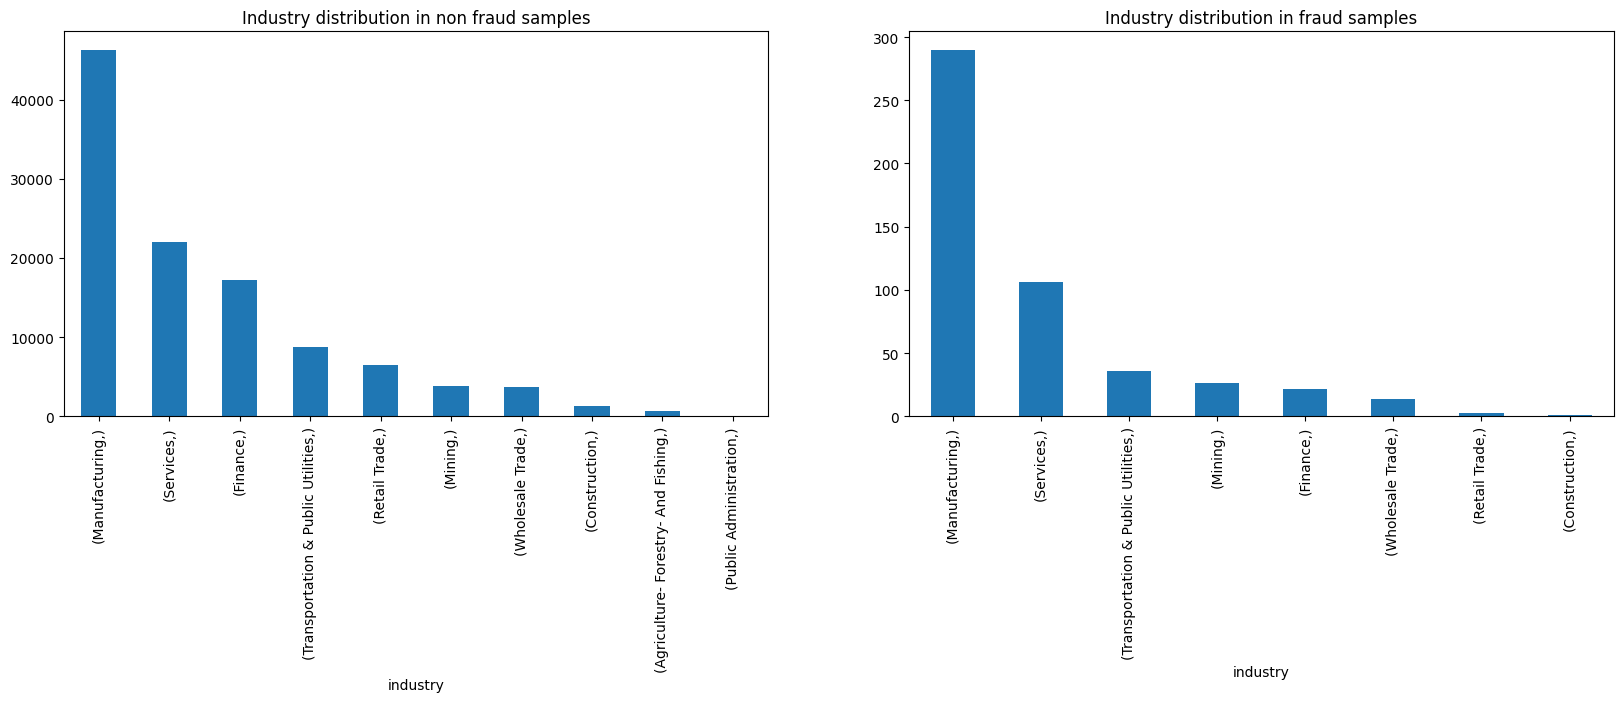

In [102]:
_,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
index_merged_no_fraud_filtered[['industry']].value_counts().plot(kind='bar', ax=ax1, title="Industry distribution in non fraud samples")
index_merged_with_fraud[['industry']].value_counts().plot(kind='bar', ax=ax2, title="Industry distribution in fraud samples")

### Remarks
 ❌ No significant difference in the distribution of industry in fraud and non frauds datasets

## Randomly downsampling the non Frauds samples
----------------------------------




- Objective : A non fraud subset of size 99% of total samples 
- A non fraud set of size : 

In [78]:
TARGET_NON_FRAUD_OVER_FRAUD_RATIO=  60/40 # 0.6 non fraud and 0.4 fraud (for a begining)

In [103]:
size_frauds = len(index_merged_with_fraud)
target_size_non_frauds = int((TARGET_NON_FRAUD_OVER_FRAUD_RATIO)*size_frauds)
target_size_non_frauds
print(size_frauds,"frauds vs",target_size_non_frauds, "non frauds")

498 frauds vs 747 non frauds


#### Sample @target_size_non_frauds samples


In [104]:
target_size_non_frauds

747

In [107]:
index_merged_no_fraud_filtered = index_merged_no_fraud_filtered.sample(n=target_size_non_frauds, random_state=42)

In [111]:
size_ratio(index_merged_with_fraud, index_merged_no_fraud_filtered)

'40.0%, 498 samples vs  747 samples'

✅ Finaly obtained  a distribution of 0.99% of fraud samples

# Final Index Dataframe

In [112]:
index_final = pd.concat([index_merged_with_fraud, index_merged_no_fraud_filtered])
index_final

aaer_no   aeer_date        role      cik  year fiscal_quarter  \
0       AAER-3490  2013-09-19  respondent    19617  2012         2012q1   
1       AAER-3585  2014-09-25  respondent  1006892  2011         2011q3   
2       AAER-3640  2015-02-24  respondent    42582  2011         2011q1   
3       AAER-3640  2015-02-24  respondent    42582  2011         2011q2   
4       AAER-3673  2015-08-06   defendant   785968  2012         2012q1   
...           ...         ...         ...      ...   ...            ...   
105153        NaN         NaN         NaN   715072  2024            NaN   
29754         NaN         NaN         NaN  1520528  2014            NaN   
67172         NaN         NaN         NaN   912093  2019            NaN   
53702         NaN         NaN         NaN  1434588  2018            NaN   
44563         NaN         NaN         NaN  1592058  2016            NaN   

                                                      url  \
0       https://www.sec.gov/files/litigation/admin/201...   
1       https://www.sec.gov/files/litigation/admin/201...   
2       https://www.sec.gov/files/litigation/admin/201...   
3       https://www.sec.gov/files/litigation/admin/201...   
4       https://www.sec.gov/files/litigation/admin/201...   
...                                                   ...   
105153                                                NaN   
29754                                                 NaN   
67172                                                 NaN   
53702                                                 NaN   
44563                                                 NaN   

                                                   labels  \
0       disclosure fraud;internal controls;financial m...   
1       disclosure fraud;accounting fraud;internal con...   
2                FCPA violations;bribery;disclosure fraud   
3                FCPA violations;bribery;disclosure fraud   
4        financial fraud;accounting fraud;reporting fraud   
...                                                   ...   
105153                                                NaN   
29754                                                 NaN   
67172                                                 NaN   
53702                                                 NaN   
44563                                                 NaN   

                                                  summary  \
0       The SEC has instituted cease-and-desist procee...   
1       The SEC has instituted cease-and-desist procee...   
2       The SEC has instituted cease-and-desist procee...   
3       The SEC has instituted cease-and-desist procee...   
4       The SEC has instituted cease-and-desist procee...   
...                                                   ...   
105153                                                NaN   
29754                                                 NaN   
67172                                                 NaN   
53702                                                 NaN   
44563                                                 NaN   

                                               complaints  ...  \
0       JPMorgan failed to maintain effective internal...  ...   
1       JDA Software Group, Inc. materially misstated ...  ...   
2       Goodyear subsidiaries in Kenya and Angola made...  ...   
3       Goodyear subsidiaries in Kenya and Angola made...  ...   
4       Miller Energy reported assets at an overstated...  ...   
...                                                   ...  ...   
105153                                                NaN  ...   
29754                                                 NaN  ...   
67172                                                 NaN  ...   
53702                                                 NaN  ...   
44563                                                 NaN  ...   

        n_benish_features  n_accrual_quality_features n_performance_features  \
0                       8            

In [ ]:
len(index_final)

70347